In the previous notebook, we looked extensively at designing non-aromatic molecules in RetroTide using a custom set of starters and extenders. We will perform a similar analysis in this notebook but by using the full set of starters and extenders to attempt the biosynthesis of more complex, aromatic molecules

In [8]:

from retrotide import retrotide, structureDB
from rdkit import Chem
from rdkit.Chem import AllChem

































































































































































































































































































































["AT{'substrate': 'isobutmal'}", "KR{'type': 'B2'}", 'loading: False']
["AT{'substrate': 'emal'}", "KR{'type': 'B1'}", 'DH{}', 'loading: False']
["AT{'substrate': 'hmal'}", 'loading: False']
["AT{'substrate': 'D-isobutmal'}", "KR{'type': 'B1'}", 'loading: False']
["AT{'substrate': 'isobutmal'}", "KR{'type': 'B1'}", 'DH{}', 'loading: False']
["AT{'substrate': 'Methylmalonyl-CoA'}", "KR{'type': 'A2'}", 'loading: False']
["AT{'substrate': 'allylmal'}", "KR{'type': 'A1'}", 'loading: False']
["AT{'substrate': 'butmal'}", "KR{'type': 'A1'}", 'loading: False']
["AT{'substrate': 'Methylmalonyl-CoA'}", "KR{'type': 'C1'}", 'loading: False']
["AT{'substrate': 'DCP'}", "KR{'type': 'B

In [9]:
def _pks_release_reaction(pks_release_mechanism: str, bound_product_mol: Chem.Mol) -> Chem.Mol:
    """
    Run a PKS offloading reaction to release a PKS product bound to its synthase via either a thiolysis or cyclization reaction
    """

    if pks_release_mechanism == 'thiolysis':
        Chem.SanitizeMol(bound_product_mol)  # run detachment reaction to produce terminal acid group
        rxn = AllChem.ReactionFromSmarts('[C:1](=[O:2])[S:3]>>[C:1](=[O:2])[O].[S:3]')
        unbound_product_mol = rxn.RunReactants((bound_product_mol,))[0][0]
        Chem.SanitizeMol(unbound_product_mol)
        return unbound_product_mol

    if pks_release_mechanism == 'cyclization':
        Chem.SanitizeMol(bound_product_mol)  # run detachment reaction to cyclize bound substrate
        rxn = AllChem.ReactionFromSmarts('([C:1](=[O:2])[S:3].[O,N:4][C:5][C:6])>>[C:1](=[O:2])[*:4][C:5][C:6].[S:3]')
        try:
            unbound_product_mol = rxn.RunReactants((bound_product_mol,))[0][0]
            Chem.SanitizeMol(unbound_product_mol)
            return unbound_product_mol

        # if the bound substrate cannot be cyclized, then return None
        except:
            raise ValueError("\nUnable to perform cyclization reaction")

Again, let's return to our favorite cryptofolione example. In previous notebooks, we built modules to synthesize cryptofolione since we knew what the correct sequence of modules, domains, starters, and extenders was to build cryptofolione. Here, we pass the 2D chemical structure of cryptofolione as a target into `RetroTide` to back out this correct sequence of modules, domains, starters, and extenders that we have been using so far.

computing module 1
   testing 2755 designs
   best score is 0.56
computing module 2
   testing 2375 designs
   best score is 0.6521739130434783
computing module 3
   testing 2375 designs
   best score is 0.76
computing module 4
   testing 2375 designs
   best score is 0.8695652173913043
computing module 5
   testing 2375 designs
   best score is 0.9565217391304348
computing module 6
   testing 2375 designs
   best score is 0.92
PKS design: [["AT{'substrate': 'cin'}", 'loading: True'], ["AT{'substrate': 'Malonyl-CoA'}", "KR{'type': 'A'}", 'loading: False'], ["AT{'substrate': 'Malonyl-CoA'}", "KR{'type': 'A'}", 'loading: False'], ["AT{'substrate': 'Malonyl-CoA'}", "KR{'type': 'B'}", 'DH{}', 'loading: False'], ["AT{'substrate': 'Malonyl-CoA'}", "KR{'type': 'A'}", 'loading: False'], ["AT{'substrate': 'Malonyl-CoA'}", "KR{'type': 'B'}", 'DH{}', 'loading: False']]
score: 0.9565217391304348


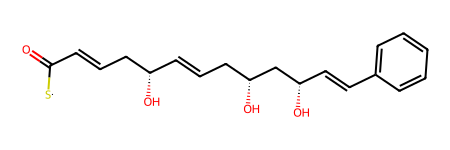

In [11]:
cryptofolione_smiles = "C1C=CC(=O)O[C@H]1/C=C/C[C@H](C[C@@H](/C=C/C2=CC=CC=C2)O)O"
cryptofolione_mol = Chem.MolFromSmiles(cryptofolione_smiles)

designs = retrotide.designPKS(targetMol = cryptofolione_mol,
                              similarity = 'mcs_without_stereo')

print('PKS design: ' + repr(designs[-1][0][0].modules))
print('score: ' + str(designs[-1][0][1]))
bound_top_PKS_product = designs[-1][0][0].computeProduct(structureDB)
bound_top_PKS_product

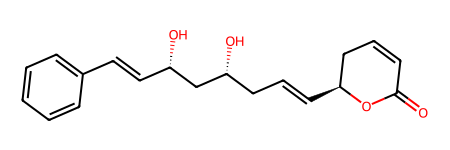

In [12]:
_pks_release_reaction(pks_release_mechanism = 'cyclization', bound_product_mol = bound_top_PKS_product)